In [26]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from AortaDataset import AortaDataset
import unet
import matplotlib.pyplot as plt

In [27]:
# load the model
model_path = 'first_model.pt'
net = unet.net
net.load_state_dict(torch.load(model_path))

In [28]:
aorta_test_dataset = AortaDataset('test')
len(aorta_test_dataset)

3

In [29]:
image, mask = aorta_test_dataset[0]

/Users/irrwitz/anaconda/envs/deep/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


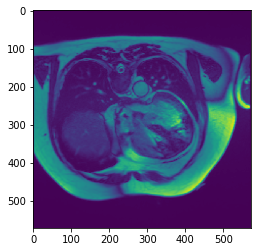

In [30]:
plt.imshow(image)

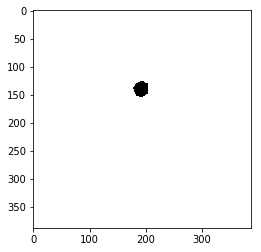

In [31]:
plt.imshow(mask[0], cmap='Greys')

In [38]:
p_image = torch.from_numpy(image)
prepared_image = torch.unsqueeze(p_image,0).float()
x = prepared_image.unsqueeze(0)
print(x.shape)
prediction = net(x)

torch.Size([1, 1, 572, 572])


In [48]:
prediction.shape

torch.Size([1, 2, 388, 388])

In [42]:
y = prediction[0].detach().numpy()
y.shape

(2, 388, 388)

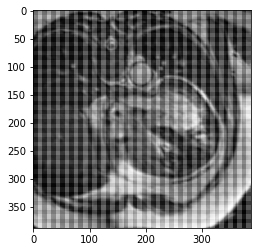

In [46]:
plt.imshow(y[1], cmap='Greys')

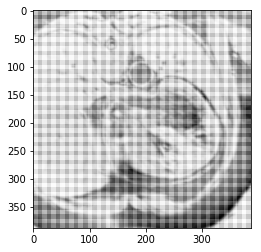

In [47]:
plt.imshow(y[0], cmap='Greys')